In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import plotly.express as px
import seaborn as sns

import prophet
%matplotlib inline

In [ ]:
data  = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv")
data_input = data.filter(regex=r'Product|W')

In [ ]:
data_input.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9


<Axes: ylabel='W1'>

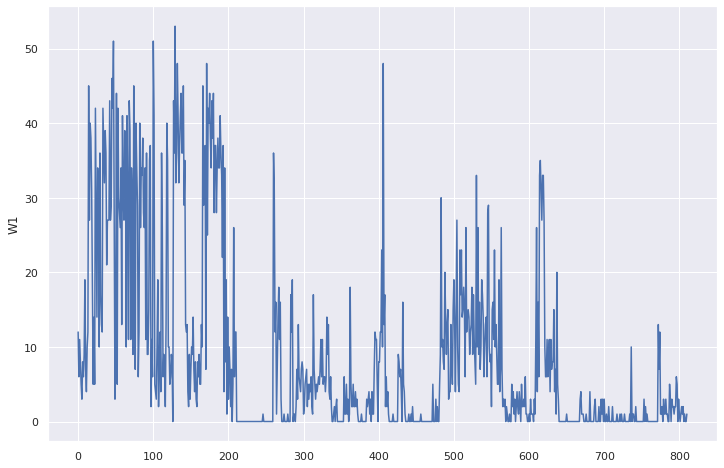

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data_input.index, y=data_input['W1'])

In [ ]:
df=data_input.reset_index()

df=pd.melt(df, id_vars='Product_Code', value_vars=['W0','W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W13','W14','W15','W16','W17','W18','W19','W20',
                                                   'W21','W22','W23','W24','W25','W26','W27','W28','W29','W30','W31','W32','W33','W34','W35','W36','W37','W38','W39','W40',
                                                   'W41','W42','W43','W44','W45','W46','W47','W48','W49','W50','W51'])
df.columns=['ds','weeks','y']
df.head()

,ds,weeks,y
0,P1,W0,11
1,P2,W0,7
2,P3,W0,7
3,P4,W0,12
4,P5,W0,8


In [ ]:
#df['ds'].str.split('P', expand=True)
#df=data_input.reset_index()                                         #  1
#df.drop(['Product_Code'], axis=1, inplace=True)                     #  2
#df['index']=df['index'].astype('datetime64[ns]')
df.head()

,index,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,0,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,1,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,2,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,3,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,4,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9


In [ ]:
df=pd.melt(df, id_vars='index', value_vars=['W0','W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W13','W14','W15','W16','W17','W18','W19','W20',
                                                   'W21','W22','W23','W24','W25','W26','W27','W28','W29','W30','W31','W32','W33','W34','W35','W36','W37','W38','W39','W40',
                                                   'W41','W42','W43','W44','W45','W46','W47','W48','W49','W50','W51'])
df.columns=['ds','weeks','y']
df.head()

,ds,weeks,y
0,0,W0,11
1,1,W0,7
2,2,W0,7
3,3,W0,12
4,4,W0,8


In [ ]:
df['ds']=df['ds'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42172 entries, 0 to 42171
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      42172 non-null  datetime64[ns]
 1   weeks   42172 non-null  object        
 2   y       42172 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 988.5+ KB


In [ ]:
groups_by_ticker=df.groupby('weeks')
groups_by_ticker.groups.keys()

dict_keys(['W0', 'W1', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W2', 'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W3', 'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W4', 'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W5', 'W50', 'W51', 'W6', 'W7', 'W8', 'W9'])

In [ ]:
def train_and_forecast (group1):
  m= Prophet()
  m.fit(group1)
  future1 = m.make_future_dataframe(periods=25)
  forecast1 = m.predict(future1)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  forecast1['weeks'] = group1['weeks'].iloc[0]
  return forecast1[['ds', 'weeks', 'yhat','yhat_lower', 'yhat_upper']]

In [ ]:
# Data processing
import pandas as pd
import numpy as np
# Prophet model for time series forecast
from prophet import Prophet


# Multi-processing
from multiprocessing import Pool, cpu_count

# Process bar
from tqdm import tqdm

# Tracking time
from time import time


In [ ]:
ticker_list = ['W0','W1','W2','W3','W4','W5','W6','W7','W8','W9','W10','W11','W12','W13','W14','W15','W16','W17','W18','W19','W20',
                                                   'W21','W22','W23','W24','W25','W26','W27','W28','W29','W30','W31','W32','W33','W34','W35','W36','W37','W38','W39','W40',
                                                   'W41','W42','W43','W44','W45','W46','W47','W48','W49','W50','W51']
for_loop_forecast1=pd.DataFrame()

for weeks in ticker_list:
  # Get the data for the ticker
  group1 = groups_by_ticker.get_group(weeks)  
  # Make forecast
  forecast1 = train_and_forecast(group1)
  # Add the forecast results to the dataframe
  for_loop_forecast1 = pd.concat((for_loop_forecast1, forecast1))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4f3_oi6b/9uniff54.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4f3_oi6b/w5gc_367.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40683', 'data', 'file=/tmp/tmp4f3_oi6b/9uniff54.json', 'init=/tmp/tmp4f3_oi6b/w5gc_367.json', 'output', 'file=/tmp/tmp4f3_oi6b/prophet_model6yjej_54/prophet_model-20230323214325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:43:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:43:25 - cmdstanpy - INFO - Chain 

In [ ]:
forecast1.head()

,ds,weeks,yhat,yhat_lower,yhat_upper
0,1970-01-01 00:00:00.000000000,W51,18.569156,7.364965,29.675982
1,1970-01-01 00:00:00.000000001,W51,18.529706,6.514673,30.081327
2,1970-01-01 00:00:00.000000002,W51,18.490256,6.981957,29.389297
3,1970-01-01 00:00:00.000000003,W51,18.450806,7.816215,28.788639
4,1970-01-01 00:00:00.000000004,W51,18.411356,7.156734,29.745219


In [ ]:
yhat=forecast1['yhat']
yhat.head()

0    18.569156
1    18.529706
2    18.490256
3    18.450806
4    18.411356
Name: yhat, dtype: float64

In [ ]:
y=df['y']
y.head()

0    11
1     7
2     7
3    12
4     8
Name: y, dtype: int64

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
print('mape : ', mape(y[:836],yhat[:836]))

mape :  9288595721557772.0
